# [Module 0.5] 피쳐 엔지니어링

이 노트북은 주로 아래와 같은 작업을 합니다.
- 피쳐를 생성하는 예시를 보여 드립니다.
    - 클릭한 시간의 피쳐 생성 
    - RFM 피쳐 생성
- 생성된 데이트 세트를 훈련 및 검증으로 분리 
- 데이터 저장 

---


# 1. 환경 셋업
- 아래는 파이썬 캐키지를 임포트할때에 캐싱된 것을 사용하지 않고, 매번 리로딩 하는 세팅 입니다.

In [24]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
%store -r

- 데이터 위치 지정

In [26]:
import pandas as pd
pd.options.display.max_rows=200
import os



# 2. 훈련 데이터 로딩 및 데이터 정리
- 아래는 데이터 로딩을 위해서 9.6 GB 가 필요합니다. 메모리 할당 에러가 나면 다른 노트북의 커널 세션을 삭제하고 해보세요. 그래도 안되면 메모리가 많은 노트북 인스턴스에서 다시 하시기 바랍니다.

In [27]:

file_path = full_local_path

df = pd.read_pickle(file_path)
df

,EVENT_LABEL,str_ip,str_app,str_device,str_os,str_channel,EVENT_TIMESTAMP,EVENT_TIMESTAMP_SIMPLE
71816445,0,str_103106,str_3,str_1,str_13,str_371,2017-11-08 00:49:06,2017-11-08 00:00:00
118420665,0,str_83928,str_3,str_1,str_19,str_417,2017-11-08 14:54:59,2017-11-08 14:00:00
2983188,0,str_36150,str_15,str_2,str_49,str_3,2017-11-06 17:27:10,2017-11-06 17:00:00
111499266,0,str_40056,str_26,str_1,str_18,str_477,2017-11-08 13:00:46,2017-11-08 13:00:00
1598682,0,str_39081,str_18,str_1,str_8,str_107,2017-11-06 16:37:52,2017-11-06 16:00:00
...,...,...,...,...,...,...,...,...
141363221,0,str_78833,str_18,str_1,str_12,str_121,2017-11-09 03:00:07,2017-11-09 03:00:00
61243158,0,str_240736,str_12,str_1,str_13,str_259,2017-11-07 16:35:49,2017-11-07 16:00:00
16118044,0,str_50440,str_18,str_3032,str_607,str_107,2017-11-07 01:58:03,2017-11-07 01:00:00
129504063,0,str_323595,str_7,str_1,str_13,str_101,2017-11-08 22:59:29,2017-11-08 22:00:00


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1849039 entries, 71816445 to 24081847
Data columns (total 8 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   EVENT_LABEL             int64         
 1   str_ip                  object        
 2   str_app                 object        
 3   str_device              object        
 4   str_os                  object        
 5   str_channel             object        
 6   EVENT_TIMESTAMP         datetime64[ns]
 7   EVENT_TIMESTAMP_SIMPLE  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(5)
memory usage: 127.0+ MB


# 3. 피쳐 생성

## 이벤트 시점의 시간 피쳐 추가

In [29]:
from src.p_utils import change_code_to_string, drop_column

def create_hour_feature(df, src_col, new_col):
    fdf = df.copy()
    fdf.insert(len(fdf.columns),column=new_col, value=fdf[src_col].apply(lambda x: x.hour))        
    
    return fdf
    
df = create_hour_feature(df, src_col='EVENT_TIMESTAMP_SIMPLE', 
                         new_col='EVENT_HOUR')    
df = change_code_to_string(df, col='EVENT_HOUR', new_col='STR_EVENT_HOUR', verbose=False)
df = drop_column(df, col='EVENT_HOUR')
df.head(10)

,EVENT_LABEL,str_ip,str_app,str_device,str_os,str_channel,EVENT_TIMESTAMP,EVENT_TIMESTAMP_SIMPLE,STR_EVENT_HOUR
71816445,0,str_103106,str_3,str_1,str_13,str_371,2017-11-08 00:49:06,2017-11-08 00:00:00,str_0
118420665,0,str_83928,str_3,str_1,str_19,str_417,2017-11-08 14:54:59,2017-11-08 14:00:00,str_14
2983188,0,str_36150,str_15,str_2,str_49,str_3,2017-11-06 17:27:10,2017-11-06 17:00:00,str_17
111499266,0,str_40056,str_26,str_1,str_18,str_477,2017-11-08 13:00:46,2017-11-08 13:00:00,str_13
1598682,0,str_39081,str_18,str_1,str_8,str_107,2017-11-06 16:37:52,2017-11-06 16:00:00,str_16
20861536,0,str_182847,str_3,str_1,str_17,str_280,2017-11-07 03:29:10,2017-11-07 03:00:00,str_3
29404151,0,str_80037,str_29,str_1,str_17,str_210,2017-11-07 05:59:52,2017-11-07 05:00:00,str_5
8242101,0,str_117157,str_9,str_1,str_19,str_134,2017-11-06 23:36:18,2017-11-06 23:00:00,str_23
162685886,0,str_119823,str_18,str_1,str_10,str_107,2017-11-09 09:14:35,2017-11-09 09:00:00,str_9
20207684,0,str_84896,str_64,str_1,str_17,str_459,2017-11-07 03:16:39,2017-11-07 03:00:00,str_3


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1849039 entries, 71816445 to 24081847
Data columns (total 9 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   EVENT_LABEL             int64         
 1   str_ip                  object        
 2   str_app                 object        
 3   str_device              object        
 4   str_os                  object        
 5   str_channel             object        
 6   EVENT_TIMESTAMP         datetime64[ns]
 7   EVENT_TIMESTAMP_SIMPLE  datetime64[ns]
 8   STR_EVENT_HOUR          object        
dtypes: datetime64[ns](2), int64(1), object(6)
memory usage: 141.1+ MB


## RMF(Recnecy, Monetary, Frequency)  Feature 추가

###  Recency, Frequency, Money (RFM) 피쳐 생성 함수
####  기본 접근 개념
- user_dic 의 유저 별로 1개의 레코드가 있고, 레코드에는 필요한 RFM 컬럼이 존재함.
``` 
user_dic = {
            'userno': {
                       'timestamp': '2021-05-15 20:11:10',
                       'past_timestamp': '2021-05-15 20:09:10',                       
                       'recent_duration': 120, 
                       'recent_freq': 1, 
                       'recent_threshold': 60,
           }
```
    - timestamp: 현재 트랜잭션의 시간을 저장 함.
    - past_timestamp: 가장 최근 과거의 트랜잭션의 시간을 저장 함.    
    - recent_duration: 현재 트랜잭션의 시간 -  가장 최근 과거의 트랜잭션 시간 
        - 현재 트랜잭션과 가장 최근 과거 트랜잭션 차이의 시간을 구하려고 함.
        - 가장 처음 트랜잭션이면 값은 0 임.
    - recent_threshold: 과거 최근 기간의 단위 (에: 60 은 60초)            
    - recent_freq: 
        - 가장 처음 트랜잭션이면 이 값은 0 이 됨
        - recent_duration 이 recent_threshold 보다 작으면 기존 값에 +1 을 함.
        - recent_duration 이 recent_threshold 보다 크면  0 로 지정 함.

- user_dic 에 userno 가 없으면 추가 하고, 존재 하면 입력함. 아래의 두가지 함수가 그 역할을 함.
    - add_user_recency()
    - update_user_recency()

### 피쳐 생성 결과
- 위의 user_dic를 사용하여 기존의 데이터 세트에 아래의 컬럼을 추가 함.
    -  'recent_regdate', 'recent_freq',
       'recent_threshold', 'recent_duration', 



In [31]:
df = df.sort_values(by= ['str_ip', 'EVENT_TIMESTAMP'])
df

,EVENT_LABEL,str_ip,str_app,str_device,str_os,str_channel,EVENT_TIMESTAMP,EVENT_TIMESTAMP_SIMPLE,STR_EVENT_HOUR
9889166,0,str_10,str_1,str_1,str_11,str_118,2017-11-07 00:10:14,2017-11-07 00:00:00,str_0
9905499,0,str_10,str_8,str_1,str_11,str_145,2017-11-07 00:10:30,2017-11-07 00:00:00,str_0
14494365,0,str_10,str_12,str_1,str_11,str_265,2017-11-07 01:28:03,2017-11-07 01:00:00,str_1
14939653,0,str_10,str_15,str_1,str_22,str_278,2017-11-07 01:36:08,2017-11-07 01:00:00,str_1
15005081,0,str_10,str_11,str_1,str_22,str_319,2017-11-07 01:37:19,2017-11-07 01:00:00,str_1
...,...,...,...,...,...,...,...,...,...
10849807,0,str_99998,str_12,str_1,str_19,str_328,2017-11-07 00:26:02,2017-11-07 00:00:00,str_0
10948579,0,str_99998,str_2,str_1,str_8,str_237,2017-11-07 00:27:37,2017-11-07 00:00:00,str_0
11442458,0,str_99998,str_3,str_1,str_19,str_442,2017-11-07 00:35:30,2017-11-07 00:00:00,str_0
11443481,0,str_99998,str_14,str_1,str_19,str_401,2017-11-07 00:35:31,2017-11-07 00:00:00,str_0


In [32]:
rfm_params = {
            "userno" : 'str_ip',     
            "event_tiemstamp" : 'EVENT_TIMESTAMP',         
         }


In [33]:
%%time 

from src.fe_utils import run_user_recency_data

rec_num = len(df)
# rec_num = 100
df_target = df[0:rec_num]

recent_threshold = 600


recent_data, user_dic = run_user_recency_data(df_target, rfm_params, recent_threshold= recent_threshold,verbose=False)


# print(df_target)
df_target.reset_index(inplace=True)
recent_freq_col = 'recent_freq' + '_' + str(recent_threshold) + '_sec'


# show_cols = ['recent_regdate','recent_duration','recent_freq','recent_threshold','recent_money_amt','recent_money_threshold']
show_cols = ['recent_regdate','recent_duration',recent_freq_col,'recent_threshold']
df_recency = pd.DataFrame(columns= show_cols, data=recent_data )
df = pd.concat([df_target, df_recency], axis=1)
df = df.drop(columns=['index', 'recent_regdate','recent_threshold'])

df

CPU times: user 2min 51s, sys: 899 ms, total: 2min 51s
Wall time: 2min 51s


,EVENT_LABEL,str_ip,str_app,str_device,str_os,str_channel,EVENT_TIMESTAMP,EVENT_TIMESTAMP_SIMPLE,STR_EVENT_HOUR,recent_duration,recent_freq_600_sec
0,0,str_10,str_1,str_1,str_11,str_118,2017-11-07 00:10:14,2017-11-07 00:00:00,str_0,0,0
1,0,str_10,str_8,str_1,str_11,str_145,2017-11-07 00:10:30,2017-11-07 00:00:00,str_0,16,1
2,0,str_10,str_12,str_1,str_11,str_265,2017-11-07 01:28:03,2017-11-07 01:00:00,str_1,4653,0
3,0,str_10,str_15,str_1,str_22,str_278,2017-11-07 01:36:08,2017-11-07 01:00:00,str_1,485,1
4,0,str_10,str_11,str_1,str_22,str_319,2017-11-07 01:37:19,2017-11-07 01:00:00,str_1,71,2
...,...,...,...,...,...,...,...,...,...,...,...
1849034,0,str_99998,str_12,str_1,str_19,str_328,2017-11-07 00:26:02,2017-11-07 00:00:00,str_0,1098,0
1849035,0,str_99998,str_2,str_1,str_8,str_237,2017-11-07 00:27:37,2017-11-07 00:00:00,str_0,95,1
1849036,0,str_99998,str_3,str_1,str_19,str_442,2017-11-07 00:35:30,2017-11-07 00:00:00,str_0,473,2
1849037,0,str_99998,str_14,str_1,str_19,str_401,2017-11-07 00:35:31,2017-11-07 00:00:00,str_0,1,3


# 4. 피쳐와 레이블의 관계 분석

### Recent Frequency

- 오른쪽 Y축이 프로드의 비율입니다. 빨간색으로 횡선이 1인 것득은 해당 IP가 모두 프로드라는 것을 의미합니다.

In [34]:
from src.p_utils import plot_cor_feature_label

/home/ec2-user/SageMaker/fraud-detector-workshop/code/phase0/prepare_data/src/p_utils.py:111: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(stats[col].astype(str).values[0:num], rotation='vertical')


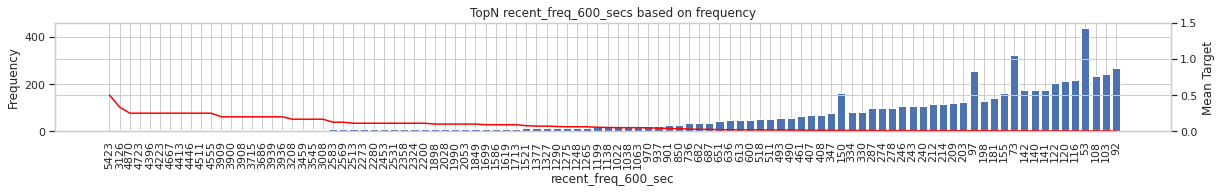

In [35]:
cor_chart_params = {
            "target_col" : 'recent_freq_600_sec',     
            "num_x_items" : 100, 
           "label_col" : 'EVENT_LABEL',
            "FigSizeW" : 20,    
            "FigSizeH": 2,            
         }

plot_cor_feature_label(df, cor_chart_params)

## 숫자 피쳐와 레이블과 상관 관계 테이블

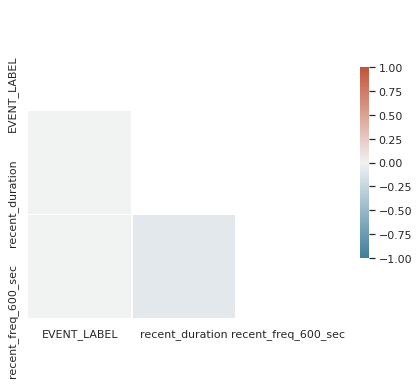

In [36]:
from src.p_utils import show_corr_matrix
    
show_corr_matrix(df, width=7, height=7)    

# 5. 데이타 Resampling (훈련, 테스트)

- 주어진 데이터의 시작 날짜와 끝 날짜를 확인 합니다.

In [37]:
print("min time: ", df.EVENT_TIMESTAMP.min())
print("max time: ", df.EVENT_TIMESTAMP.max())

min time:  2017-11-06 15:46:38
max time:  2017-11-09 16:00:00


## 훈련 및 테스트 샘플링 함수
- 데이터 세트를 train_end 보다 작은 것을 훈련 데이터 세트, test_start 큰 것을 테스트 데이터 세트로 분리 합니다.
- 전체 샘플링 개수를 기술 합니다. (에: total_samples = 200,000)
- 샘플링 데이터 세트에서 훈련, 테스트 분리의 비율을 기술 합니다. 
    - (예: split_rate: 0.1)
        - 훈련 90%, 테스트 10%
- 결과로서 훈련, 테스트 샘플 데이터 세트에서 프로드의 비율 및 개수를 확인 합니다.        
    

In [38]:
from src.p_utils import split_data_by_time
    
train_df, test_df = split_data_by_time(
                       df=df, 
                       target_col='EVENT_TIMESTAMP', 
                       label_col = 'EVENT_LABEL',
                       total_samples=200000, 
                       split_rate=0.1, 
                       train_end='2017-11-08 23:59', 
                       test_start='2017-11-09 00:00',    
                       verbose = True,
                  )    

train sample shape:  (180000, 11)
train min time:  2017-11-06 15:46:38
train max time:  2017-11-08 23:59:00
Train fraud ratio:  0.00264
# of Train frauds:  475

test sample shape:  (20000, 11)
test min time:  2017-11-09 00:00:01
test max time:  2017-11-09 15:59:55
Test fraud ratio:  0.00275
# of test frauds:  55


# 6. 데이터 저장

## 로컬에 데이터 CSV 로 저장
- 로컬에 훈련 및 테스트 데이터 세트 저장
    - data/train/train.csv
    - data/test/test.csv

In [39]:
from src.p_utils import save_csv_local

train_file_name = 'train-' + str(train_df.shape[0]) + ".csv"
train_local_path = save_csv_local(raw_df=train_df, preproc_folder='data/train', 
                                  label='EVENT_LABEL', file_name=train_file_name)
print("train_local_path: ", train_local_path)

test_file_name = 'test-' + str(test_df.shape[0]) + ".csv"
test_local_path = save_csv_local(raw_df=test_df, preproc_folder='data/test', 
                                  label='EVENT_LABEL', file_name=test_file_name)
print("test_local_path: ", test_local_path)

data/train/train-180000.csv is saved
train_local_path:  data/train/train-180000.csv
data/test/test-20000.csv is saved
test_local_path:  data/test/test-20000.csv


## S3에 데이로 업로딩
- 위의 파일을 S3에 업로드

In [40]:
import sagemaker

bucket = sagemaker.Session().default_bucket()
# 프로젝트 변수
project_prefix = 'adtalking_fraud_phase0'


# S3에 저장되는 데이터의 기본 폴더 위치
s3_train_data_uri = f"s3://{bucket}/{project_prefix}/train"
s3_test_data_uri = f"s3://{bucket}/{project_prefix}/test"


In [41]:
s3_train_data_uri = sagemaker.s3.S3Uploader.upload(
    local_path=train_local_path, 
    desired_s3_uri=s3_train_data_uri,    
)
print("s3_train_data_uri: \n", s3_train_data_uri)

s3_test_data_uri = sagemaker.s3.S3Uploader.upload(
    local_path=test_local_path, 
    desired_s3_uri=s3_test_data_uri,    
)
print("s3_test_data_uri: \n", s3_test_data_uri)



s3_train_data_uri: 
 s3://sagemaker-us-east-1-057716757052/adtalking_fraud_phase0/train/train-180000.csv
s3_test_data_uri: 
 s3://sagemaker-us-east-1-057716757052/adtalking_fraud_phase0/test/test-20000.csv


# 7. 변수 저장
- 다른 노트북에서 아래 변수의 값을 사용하기 위해서 저장 합니다.

In [42]:
%store project_prefix
%store bucket
%store train_local_path
%store test_local_path
%store s3_train_data_uri
%store s3_test_data_uri

Stored 'project_prefix' (str)
Stored 'bucket' (str)
Stored 'train_local_path' (str)
Stored 'test_local_path' (str)
Stored 's3_train_data_uri' (str)
Stored 's3_test_data_uri' (str)
